In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
mcdonalds = pd.read_csv("mcdonalds.csv")

In [4]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
print(mcdonalds.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [6]:
print(mcdonalds.shape)

(1453, 15)


In [7]:
# Select the first 11 columns
MD_x = mcdonalds.iloc[:, :11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Compute column means and round to 2 decimal places
col_means = MD_x.mean().round(2)

print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_11856\62296766.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)


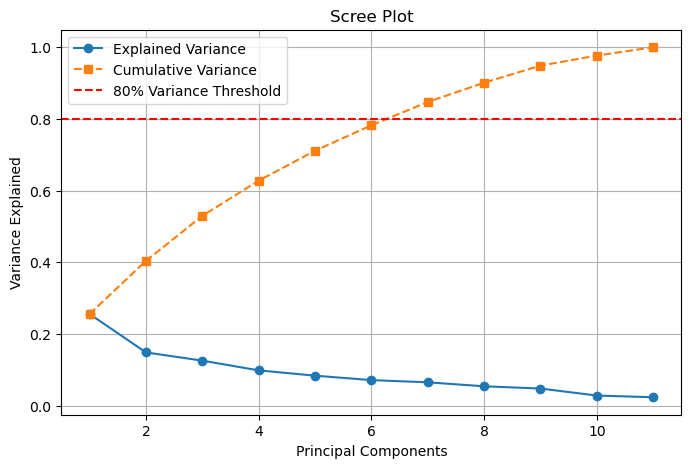

In [8]:
 #Select first 11 columns and convert "Yes" to 1, "No" to 0
MD_x = mcdonalds.iloc[:, :11].applymap(lambda x: 1 if x == "Yes" else 0)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x_scaled)

# Explained variance and cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# ---- Scree Plot ----
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-', label="Explained Variance")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's--', label="Cumulative Variance")
plt.axhline(y=0.8, color='r', linestyle='dashed', label="80% Variance Threshold")
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Scree Plot")
plt.legend()
plt.grid()
plt.show()




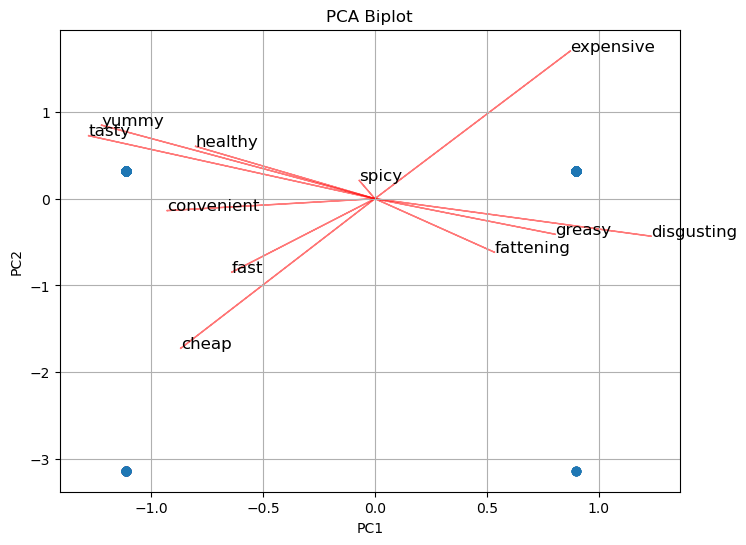

In [9]:
# ---- PCA Biplot ----
def biplot(pca, components, feature_names):
    plt.figure(figsize=(8, 6))
    scores = components[:, :2]  # First two PCs
    loadings = pca.components_[:2, :]  # Loadings of the first two PCs
    
    # Scatter plot of data points
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.3)
    
    # Plot feature vectors
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, loadings[0, i] * 3, loadings[1, i] * 3, color='red', alpha=0.5)
        plt.text(loadings[0, i] * 3, loadings[1, i] * 3, feature, color='black', fontsize=12)
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid()
    plt.show()

biplot(pca, MD_x_scaled, MD_x.columns)

In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

C:\Users\SHREYA SHAMBHAVI\AppData\Local\Temp\ipykernel_11856\511905345.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = mcdonalds.iloc[:, 1:11].applymap(lambda x: 1 if x == "Yes" else 0)


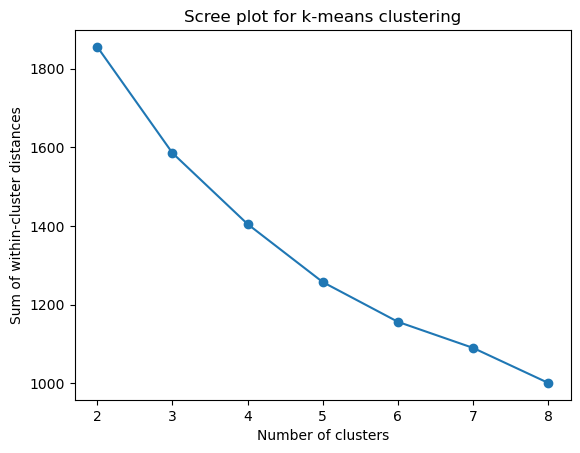

Cluster Centers:
 [[0.95959596 0.08080808 0.72525253 0.         0.96161616 0.87676768
  0.76565657 0.02626263 0.31717172 0.06262626]
 [0.94142259 0.11087866 0.9748954  1.         0.94979079 0.89121339
  0.62552301 0.08786611 0.14225941 0.30962343]
 [0.82083333 0.08958333 0.90625    0.59791667 0.7875     0.02083333
  0.5375     0.96875    0.13333333 0.3625    ]]
Cluster Assignments:
 0     0
1     1
2     2
3     1
4     1
5     0
6     2
7     1
8     2
9     2
10    0
11    2
12    0
13    2
14    2
15    0
16    1
17    1
18    2
19    2
Name: Cluster, dtype: int32


In [11]:
X = mcdonalds.iloc[:, 1:11].applymap(lambda x: 1 if x == "Yes" else 0)

# Running k-means for different k values
k_values = range(2, 9)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot scree plot (elbow method)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Sum of within-cluster distances")
plt.title("Scree plot for k-means clustering")
plt.show()

# Running k-means with optimal k (assume k=3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=1234)
mcdonalds["Cluster"] = kmeans.fit_predict(X)

# Display cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Display first few cluster assignments
print("Cluster Assignments:\n", mcdonalds["Cluster"].head(20))

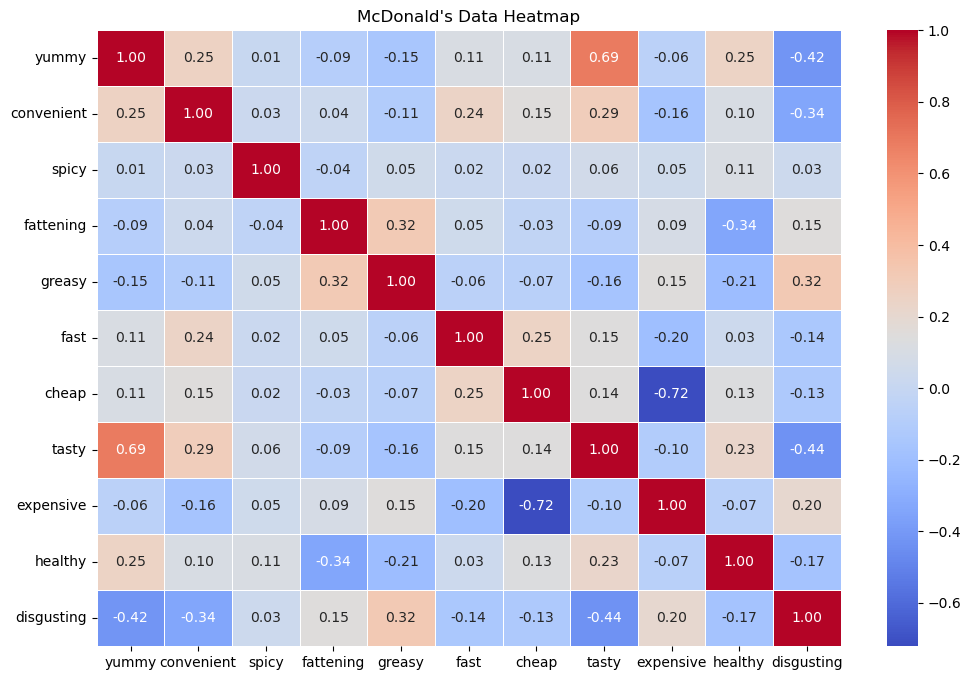

In [14]:
# Convert only 'Yes'/'No' columns to numeric (1/0) & ignore text columns
df_numeric = mcdonalds.copy()
for col in df_numeric.columns:
    unique_vals = df_numeric[col].dropna().unique()
    if set(unique_vals) == {"Yes", "No"}:  # Check if column contains only 'Yes'/'No'
        df_numeric[col] = df_numeric[col].map({"Yes": 1, "No": 0})
    else:
        df_numeric.drop(columns=[col], inplace=True)  # Drop non-numeric columns

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("McDonald's Data Heatmap")
plt.show()

In [17]:
import seaborn as sns


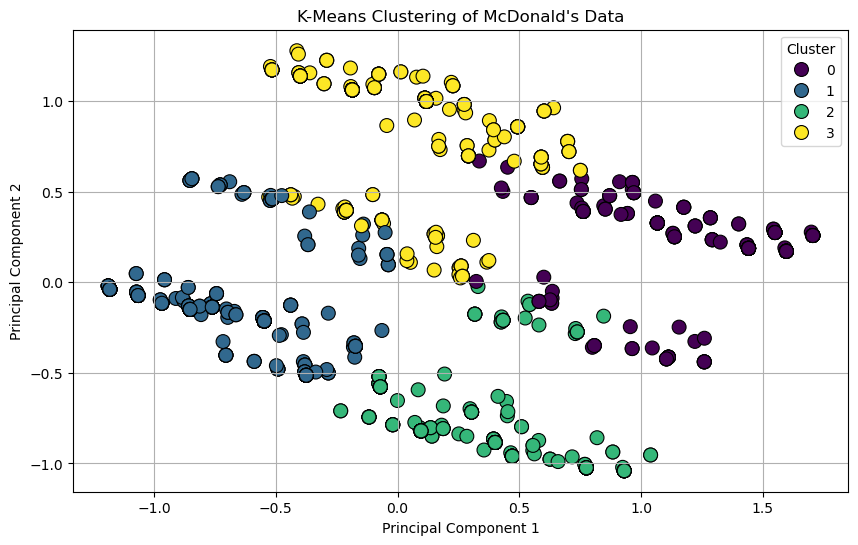

In [20]:
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
df_numeric["Cluster"] = kmeans.fit_predict(df_numeric)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_numeric.iloc[:, :-1])  # Exclude cluster column

# Plot K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_numeric["Cluster"], palette="viridis", s=100, edgecolor="black")
plt.title("K-Means Clustering of McDonald's Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()